# Simulation #2
Having written the functions required to implement estimation of $\mathcal{P}$, we now experiment with a few different model parameters.

In [1]:
using JLD

In [2]:
include("functions.jl");

## The setup
As before, we set up the state space as the flat torus $\mathbb{T}^2$, represented by the square $[0, 2\pi] \times [0, 2\pi]$.

In [3]:
range = 2π;

In [4]:
grid_size = 100;
n_gridpoints = grid_size ^ 2;
grid = creategrid(0, range, grid_size);

Throughout all of our experiments, we will use the same sample of $N=10000$ points drawn from the uniform distribution.

In [5]:
sample_size = 10000;
s = sampledist(sample_size, range);

## Experimentation
We can now run various experiments using different model parameters.

In [11]:
maps = ["standard", "cat"];
n_bases = [5, 10, 25, 33];
epsilons = [0.06, 0.6, 6];

## Varying the number of basis functions
Varying the number of basis functions should have a significant effect on our estimation of $\mathcal{P}$, since this will by definition alter the structure of the subspace in which we are estimating $\mathcal{P}$.

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 25 rows, 10025 columns and 250025 nonzeros
Model fingerprint: 0x067e92b6
Model has 10025 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-06, 1e+00]
  Objective range  [3e-02, 3e-02]
  QObjective range [2e-02, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 5e+00]
Presolve time: 0.04s
Presolved: 25 rows, 10025 columns, 250025 nonzeros
Presolved model has 10025 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+02
 Factor NZ  : 3.250e+02 (roughly 4 MBytes of memory)
 Factor Ops : 5.525e+03 (less than 1 second per iteration)
 Threads    : 2

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.60486338e+09 -1.

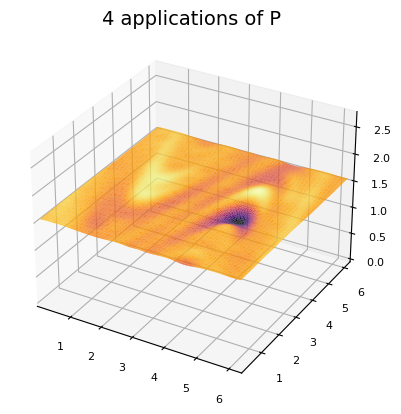

0.10455039605312749


In [8]:
for n in n_bases
    output = estimate_P(grid, s, n; map_type="standard")
    P_diagnostics(output, "bases")
end

Happily, the estimation process appears robust for all four of the scenarios explored.

## Varying $\epsilon$
Similarly, varying $\epsilon$ will alter the subspace in which we are estimating $\mathcal{P}$.

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 100 rows, 10100 columns and 8707 nonzeros
Model fingerprint: 0xfc43d14a
Model has 10100 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [8e-03, 8e-03]
  QObjective range [2e-02, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e-02]
Presolve removed 0 rows and 1575 columns
Presolve time: 0.01s
Presolved: 100 rows, 8525 columns, 8707 nonzeros
Presolved model has 8525 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.220e+02
 Factor NZ  : 9.620e+02 (roughly 3 MBytes of memory)
 Factor Ops : 1.102e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective         

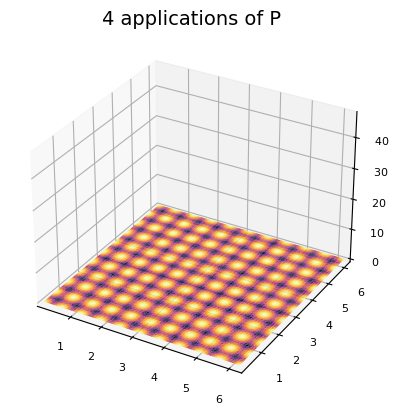

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 100 rows, 10100 columns and 1000100 nonzeros
Model fingerprint: 0xafc5e753
Model has 10100 quadratic objective terms
Coefficient statistics:
  Matrix range     [6e-01, 1e+00]
  Objective range  [8e-03, 8e-03]
  QObjective range [2e-02, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 1e+02]
Presolve time: 0.19s
Presolved: 100 rows, 10100 columns, 1000100 nonzeros
Presolved model has 10100 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.950e+03
 Factor NZ  : 5.050e+03 (roughly 4 MBytes of memory)
 Factor Ops : 3.384e+05 (less than 1 second per iteration)
 Threads    : 2

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.61464472e+09

In [12]:
for epsilon in epsilons
    output = estimate_P(grid, s, 10, epsilon; map_type="standard")
    P_diagnostics(output, "epsilons")
end

In this case, the estimation process breaks down when our choice of $\epsilon$ is too far the from the optimal point.

## Varying the dynamical map
I will try three different maps:
1. The standard map. This is known to have Lebesgue measure as the invariant density.
2. The cat map. This too should have a constant function as its invariant density.
3. The perturbed cat map. Even by perturbing the cat map only slightly, we should here obtain a non-constant function as the invariant density.

In [9]:
for map in maps
    output = estimate_P(grid, s, 20; map_type=map)
    P_diagnostics(output, "maps")
end

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 400 rows, 10400 columns and 941167 nonzeros
Model fingerprint: 0x43793144
Model has 10400 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [2e-03, 2e-03]
  QObjective range [2e-02, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-01, 3e-01]
Presolve time: 0.22s
Presolved: 400 rows, 10400 columns, 941167 nonzeros
Presolved model has 10400 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 7.076e+04
 Factor NZ  : 8.020e+04 (roughly 5 MBytes of memory)
 Factor Ops : 2.141e+07 (less than 1 second per iteration)
 Threads    : 2

                  Objective                Residual
Iter       Primal  

LoadError: MethodError: no method matching ArgumentError(::String, ::String)
[0mClosest candidates are:
[0m  ArgumentError(::AbstractString) at boot.jl:317
[0m  ArgumentError(::Any) at boot.jl:317

As expected, estimation works fine in both cases, though we can see clear differences in the evolution of the density.